Result y: -5.394172664097141e-09+-2.208526849746704*P(1.367587154632588e-09+0.2554861009120941)


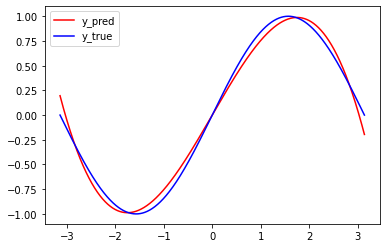

In [136]:
'''
A simple network created using torch , manually initiallizing and updating weights,Used Function class from torch.autograd to implement forward
and backward pass, where forward function takes input tensor and calculate output tensor while backward takes gradient of loss wrt output and returns
gradient of loss wrt to input
'''

from torch.autograd import backward
import torch
import math
import matplotlib.pyplot as plt


class LegendPolynomial(torch.autograd.Function):
  @staticmethod
  def forward(ctx, input):
    ctx.save_for_backward(input)
    return 0.5 * (5*input **3 - 3*input)
  def backward(ctx, grad_output):
    input, = ctx.saved_tensors
    return grad_output * 1.5 * (5 * input ** 2  -  1) 


device = torch.device("cpu")
dtype = torch.float32

x = torch.linspace(-math.pi , math.pi ,2000,device=device,dtype=dtype)#input
y = torch.sin(x)#output

#initialize random weights
#a = torch.rand((),device=device,dtype=dtype, requires_grad=True)
#b = torch.rand((),device=device,dtype=dtype,requires_grad=True)
#c = torch.rand((),device=device,dtype=dtype,requires_grad=True)
#d = torch.rand((),device=device,dtype=dtype,requires_grad=True)
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for i in range(2000):
  P = LegendPolynomial.apply  #apply function
  y_pred = a + b * P (c + d * x)#forward pass
  loss = (y_pred - y).pow(2).sum()#loss
  loss.backward()#back propogation
  #update weights manually
  with torch.no_grad():
    a -= learning_rate * a.grad
    b -= learning_rate * b.grad
    c -= learning_rate * c.grad
    d -= learning_rate * d.grad
    #manually zero all gradients so that they don't get add to next gradients
    a.grad =None
    b.grad =None
    c.grad =None
    d.grad =None

print(f'Result y: {a.item()}+{b.item()}*P({c.item()}+{d.item()})')

plt.figure()

plt.plot(x,y_pred.detach().numpy(), color = 'r', label='y_pred')
plt.plot(x,y.detach().numpy(), color = 'b',label='y_true')
plt.legend()

#plt.plot(y,x,color = 'k')




